<Figure size 432x288 with 0 Axes>

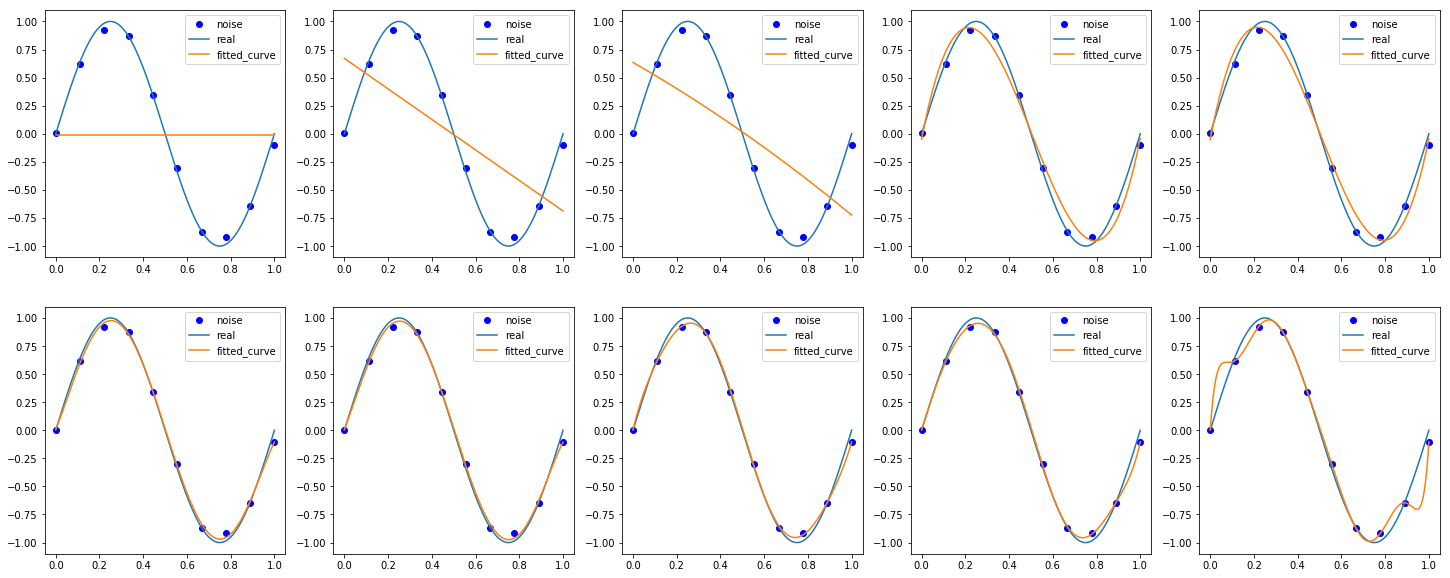

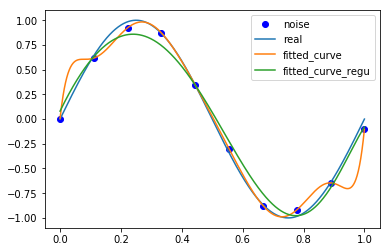

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

def real_func(x):
    return np.sin(2 * np.pi * x)


class Leastsq:
    def __init__(self, M):
        self.p_init = np.random.rand(M + 1)
        self.regularization = 0.001

    @staticmethod
    def fit_func(p, x):
        f = np.poly1d(p)
        return f(x)

    def residuals_loss(self, p, x, y):
        return self.fit_func(p, x) - y

    def residuals_loss_regularization(self, p, x, y):
        ret = self.residuals_loss(p, x, y)
        ret = np.append(ret, np.sqrt(0.5 * self.regularization * np.square(p)))
        return ret

    def fitting(self, is_L2, x, y):
        loss = self.residuals_loss_regularization if is_L2 else self.residuals_loss
        p_lsq = leastsq(loss, self.p_init, args=(x, y))
        return p_lsq[0]

    def draw(self, p_lsq):
        plt.plot(x, y, 'bo', label='noise')
        plt.plot(x_points, real_func(x_points), label='real')
        plt.plot(x_points, self.fit_func(p_lsq, x_points), label='fitted_curve')
        plt.legend()


if __name__ == "__main__":
    x = np.linspace(0, 1, 10)
    y = real_func(x)
    y = [np.random.normal(0, 0.1) + y1 for y1 in y]
    x_points = np.linspace(0, 1, 1000)

    lsq = []
    plt.clf()
    plt.figure(figsize=(25, 10))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        now = Leastsq(i)
        lsq.append(now.fitting(False, x, y))
        now.draw(lsq[i])
    plt.show()

    plt.clf()
    now = Leastsq(9)
    p_lsq_regularization = now.fitting(True, x, y)

    plt.plot(x, y, 'bo', label='noise')
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, now.fit_func(lsq[9], x_points), label='fitted_curve')
    plt.plot(x_points, now.fit_func(p_lsq_regularization, x_points), label='fitted_curve_regu')
    plt.legend()
    plt.show()
